In [2]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('loan_approval_dataset.csv')

# Loan Approval Prediction Project

## Objective
Build a machine learning model to predict whether a loan application will be approved based on applicant information and financial data.

## Dataset
- **Source**: Loan-Approval-Prediction-Dataset (Kaggle)
- **Problem Type**: Binary Classification
- **Focus**: Handling imbalanced data with precision, recall, and F1-score evaluation

## Tools & Libraries
- Pandas
- Scikit-learn
- Imbalanced-learn (SMOTE)
- Matplotlib (Visualization)

### 2.1 Missing Values Analysis

In [4]:
if df.isnull().sum().any():
    print(df.isnull().sum())
else:
    print("No missing values")

No missing values


### 2.3 Target Variable Distribution
Analyzing the distribution of loan approvals vs rejections to identify class imbalance.

In [5]:
df[' loan_status'].value_counts(normalize=True) * 100

 loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64

## 3. Data Preprocessing
### 3.1 Categorical Feature Encoding
Converting categorical variables (education, employment status) to numerical format for machine learning algorithms.
- Graduate = 1, Not Graduate = 0
- Self Employed = 1, Not Self Employed = 0

In [6]:
df['education_encoded'] = df[' education'].map({' Graduate': 1, ' Not Graduate': 0})
df['self_employed_encoded'] = df[' self_employed'].map({' Yes': 1, ' No': 0})

### 3.2 Feature Engineering
Creating new features that capture important financial ratios:
- **Loan-to-Income Ratio**: Measures borrowing relative to earning capacity
- **Total Assets**: Sum of all asset values
- **Assets-to-Loan Ratio**: Ability to cover loan with assets

In [7]:
df['loan_to_income'] = df[' loan_amount'] / df[' income_annum']
df['total_assets'] = (df[' residential_assets_value'] + df[' commercial_assets_value'] + df[' luxury_assets_value'] + df[' bank_asset_value'])
df['assets_to_loan'] = df['total_assets'] / df[' loan_amount']

## 4. Model Preparation
### 4.1 Feature and Target Selection
Separating features (X) from target variable (Y) and removing unnecessary columns.

In [8]:
X = df.drop(['loan_id', ' education', ' self_employed', ' loan_status'], axis=1)
Y = df[' loan_status']

### 4.2 Train-Test Split
Splitting data into training (80%) and testing (20%) sets with stratification to maintain class distribution.

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)
print("Training set size: ", X_train.shape)
print("Test set size: ", X_test.shape)
print("Train target distriution: ")
print(Y_train.value_counts(normalize=True))

Training set size:  (3415, 14)
Test set size:  (854, 14)
Train target distriution: 
 loan_status
Approved    0.622255
Rejected    0.377745
Name: proportion, dtype: float64


## 5. Handling Class Imbalance
### 5.1 SMOTE Application
Using Synthetic Minority Oversampling Technique (SMOTE) to balance the training dataset and improve model performance on minority class.

In [10]:
smote = SMOTE(random_state=42)

X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)
print("Before SMOTE:")
print(Y_train.value_counts())
print("\nAfter SMOTE:")
print(Y_train_balanced.value_counts())
print(f"\nTraining set size increased from {len(Y_train)} to {len(Y_train_balanced)}")


Before SMOTE:
 loan_status
Approved    2125
Rejected    1290
Name: count, dtype: int64

After SMOTE:
 loan_status
Rejected    2125
Approved    2125
Name: count, dtype: int64

Training set size increased from 3415 to 4250


### 5.2 Feature Scaling
Standardizing features to have mean=0 and std=1, essential for logistic regression convergence.

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

## 6. Model Training
### 6.1 Logistic Regression
Training a logistic regression model as our baseline classifier.

In [12]:
lr = LogisticRegression(random_state=42, max_iter=200)
lr.fit(X_train_scaled, Y_train_balanced)
Y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression predictions shape:", Y_pred_lr.shape)

Logistic Regression predictions shape: (854,)


### 6.2 Logistic Regression Evaluation
Evaluating model performance with focus on precision, recall, and F1-score for imbalanced data.

In [13]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

    Approved       0.94      0.94      0.94       531
    Rejected       0.90      0.91      0.90       323

    accuracy                           0.93       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854

Confusion Matrix:
[[498  33]
 [ 30 293]]


### 6.3 Decision Tree Classifier
Training a decision tree model to compare with logistic regression performance.

In [14]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, Y_train_balanced)
Y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree predictions shape:", Y_pred_dt.shape)

Decision Tree predictions shape: (854,)


### 6.4 Decision Tree Evaluation
Comparing decision tree performance against logistic regression using classification metrics.

In [15]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00       531
    Rejected       1.00      1.00      1.00       323

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854

Confusion Matrix:
[[530   1]
 [  0 323]]


## 7. Results Summary

In [16]:
print("comparing both models: ")
print(f"\nLogistic Regression F1-Score: {f1_score(Y_test, Y_pred_lr, average='weighted'):.3f}")
print(f"Decision Tree F1-Score: {f1_score(Y_test, Y_pred_dt, average='weighted'):.3f}")

comparing both models: 

Logistic Regression F1-Score: 0.926
Decision Tree F1-Score: 0.999



Based on the weighted F1-Score, the Decision Tree model performed slightly better than Logistic Regression.
This suggests that the relationship between features and loan approval status might be non-linear,
which Decision Trees are better at capturing.

Top 10 Most Important Features:
                      feature  importance
4                 cibil_score    0.848458
11             loan_to_income    0.076654
3                   loan_term    0.057206
13             assets_to_loan    0.016747
5    residential_assets_value    0.000935
0            no_of_dependents    0.000000
2                 loan_amount    0.000000
1                income_annum    0.000000
6     commercial_assets_value    0.000000
7         luxury_assets_value    0.000000


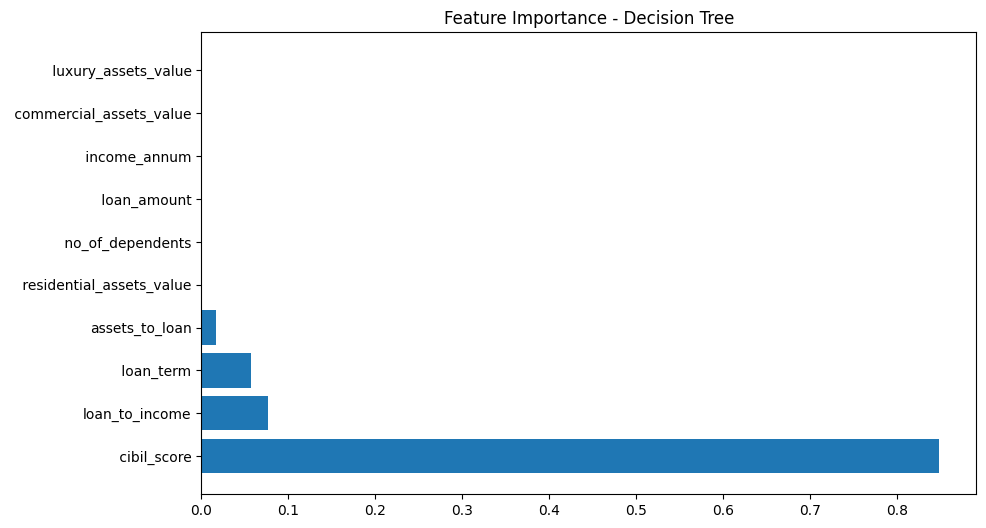

In [17]:
print("\nBased on the weighted F1-Score, the Decision Tree model performed slightly better than Logistic Regression.")
print("This suggests that the relationship between features and loan approval status might be non-linear,")
print("which Decision Trees are better at capturing.\n")
feature_names = X_train.columns
importance = dt.feature_importances_

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance.head(10)['feature'], feature_importance.head(10)['importance'])
plt.title('Feature Importance - Decision Tree')
plt.show()